In [88]:
from bs4 import BeautifulSoup
import requests
import pickle
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import scipy as sp
%matplotlib inline
import math
import matplotlib.pyplot as plt

In [2]:
#List of pages to scrape from

LLS = []

for i in range(1973,2016):
    link = "%s%s" %('http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=',i)
    LLS.append(link)
    
    

In [3]:
LLS

['http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1973',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1974',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1975',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1976',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1977',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1978',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1979',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1980',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1981',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1982',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1983',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1984',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=1985',
 'http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear

In [4]:
#Getting all the information from previous world records.

recordslist = []
for i in range(len(LLS)):
    recordentries = []
    r= requests.get(LLS[i])
    soup = BeautifulSoup(r.content)
    rows = soup.find_all("tr")
    for row in rows:
        cells = row.find_all('td')
        texcell = []
        for td in cells:    
            texcell.append(td.text)
        recordentries.append(texcell)
    recordslist.append(recordentries) 

In [110]:
#Creating a coherent list of all world records.
allrecords = []
for record in recordslist:
    y = 1973+recordslist.index(record)
    for lifter in record[1:]:
        if lifter[0] !='' and lifter[2] !='' and lifter[3] !='' and lifter[4] !='':
            bw = lifter[0].replace(u"\xa0",u' ')
            bw = bw.split(' ')
            k =len(bw)-1
            bw = bw[k][1:-3]
            if '+' in bw:
                bw = float(bw[:-1])+11
            elif '' == bw:
                bw = 100
            else:
                bw =float(bw)
             
            
            
            namecountry = lifter[2].split(' ')
            
            if 'Cuba' == namecountry[len(namecountry)-1]:
                country = 'Cuba'
                for i in range(len(namecountry)-1):
                    name = namecountry[0].replace(u"\xa0",u' ')
                
            elif len(namecountry) >2:    
                n = len(namecountry)-1
                country = "%s %s" % (namecountry[n-1],namecountry[n])
                name = namecountry[0].replace(u"\xa0",u' ')  
                
            else:
                
                country = namecountry[1]
                name = namecountry[0].replace(u"\xa0",u' ')
            
            if country == 'East Germany':
                country = 'Germany'
            
            elif country == 'Soviet Union':
                country = 'Russia'
                
            
            
            event = lifter[3].replace(u"\xa0",u'').split(' ')
            if event[0] == 'Total2':
                event = 'Total'
              
            elif event[0]=='Clean':
                event = 'Clean and Jerk'
            else:
                event = 'Snatch'
        
            result = lifter[4].replace(u"\xa0",u'')
            if result !='':    
                result = float(result)
            
                allrecords.append((event ,y , country, name, bw, result))

In [111]:
allrecords

[('Total', 1973, 'Russia', u'Vladimir SMETANIN', 52.0, 232.5),
 ('Total', 1973, u'Iran', u'Mohammad NASSIRI', 52.0, 235.0),
 ('Total', 1973, u'Iran', u'Mohammad NASSIRI', 52.0, 240.0),
 ('Clean and Jerk', 1973, u'Iran', u'Mohammad NASSIRI', 52.0, 135.0),
 ('Clean and Jerk', 1973, u'Iran', u'Mohammad NASSIRI', 52.0, 140.0),
 ('Snatch', 1973, u'Japan', u'Takeshi HORIKOSHI', 52.0, 105.5),
 ('Total', 1973, 'Russia', u'Gennady CHETIN', 56.0, 255.0),
 ('Total', 1973, u'Bulgaria', u'Atanas KIROV', 56.0, 257.5),
 ('Clean and Jerk', 1973, u'Iran', u'Mohammad NASSIRI', 56.0, 151.0),
 ('Snatch', 1973, u'Japan', u'Koji MIKI', 56.0, 116.0),
 ('Snatch', 1973, u'Japan', u'Koji MIKI', 56.0, 117.5),
 ('Clean and Jerk', 1973, 'Russia', u'Yury GOLUBTSOV', 60.0, 158.5),
 ('Total', 1973, 'Russia', u'Mukharby KIRZHINOV', 67.5, 312.5),
 ('Total', 1973, 'Russia', u'Valentin MIKHAILOV', 75.0, 327.5),
 ('Total', 1973, u'Bulgaria', u'Nedelcho KOLEV', 75.0, 330.0),
 ('Total', 1973, u'Bulgaria', u'Nedelcho KOLEV',

In [112]:
#Passing the information onto Pandas to facilitate the analysis.
records = pd.DataFrame(allrecords, columns=['Event', 'Year', 'Country','Lifter', 'Weight Class', 'Record'])

In [113]:
records.head()

,Event,Year,Country,Lifter,Weight Class,Record
0,Total,1973,Russia,Vladimir SMETANIN,52,232.5
1,Total,1973,Iran,Mohammad NASSIRI,52,235.0
2,Total,1973,Iran,Mohammad NASSIRI,52,240.0
3,Clean and Jerk,1973,Iran,Mohammad NASSIRI,52,135.0
4,Clean and Jerk,1973,Iran,Mohammad NASSIRI,52,140.0


In [114]:
#Amount of world Records broken by the different countries.
records.groupby('Country')['Record'].count()

Country
Armenia             4
Belarus            18
Belgium             1
Bulgaria          227
China              52
Croatia             1
Cuba               22
Czechoslovakia      3
Finland             2
Georgia             4
Germany            28
Greece             22
Hungary             2
Iran               12
Japan               8
Kazakhstan          8
North Korea        13
Norway              1
Poland              9
Romania             2
Russia            394
South Korea         1
Turkey             47
Turkmenistan        1
Ukraine             9
Uzbekistan          1
West Germany        2
Name: Record, dtype: int64

In [115]:
#Records sorted by body weight and record to see the progression better.
records.sort(['Weight Class', 'Record'], ascending=True)

,Event,Year,Country,Lifter,Weight Class,Record
5,Snatch,1973,Japan,Takeshi HORIKOSHI,52,105.5
48,Snatch,1974,Hungary,Gyorgy KOSZEGI,52,106.0
49,Snatch,1974,Japan,Takeshi HORIKOSHI,52,106.5
91,Snatch,1975,Russia,Alexander VORONIN,52,107.0
92,Snatch,1975,Russia,Alexander VORONIN,52,107.5
93,Snatch,1975,Japan,Masamoto TAKEUCHI,52,108.0
136,Snatch,1976,Russia,Alexander VORONIN,52,108.5
177,Snatch,1977,Russia,Alexander VORONIN,52,109.0
196,Snatch,1978,North Korea,Gyong-Si HAN,52,109.5
224,Snatch,1979,Russia,Alexander VORONIN,52,110.0


In [130]:
class56 = records[(records['Event'] == 'Total') & (records['Weight Class'] == 56)]

In [140]:
class56

,Event,Year,Country,Lifter,Weight Class,Record
6,Total,1973,Russia,Gennady CHETIN,56,255.0
7,Total,1973,Bulgaria,Atanas KIROV,56,257.5
50,Total,1974,Bulgaria,Atanas KIROV,56,260.0
137,Total,1976,Bulgaria,Norair NURIKIAN,56,262.5
227,Total,1979,Bulgaria,Anton KODZHABASHEV,56,265.0
228,Total,1979,Russia,Yurik SARKISYAN,56,267.5
284,Total,1980,Russia,Victor VERETENNIKOV,56,270.0
285,Total,1980,Russia,Yurik SARKISYAN,56,272.5
286,Total,1980,Cuba,Daniel NUNEZ,56,275.0
340,Total,1981,Germany,Andreas LETZ,56,277.5


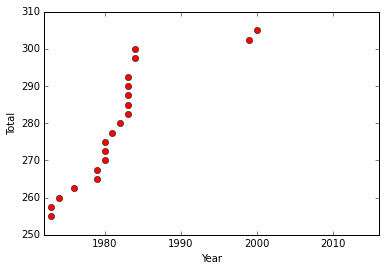

In [142]:
plt.plot(class56['Year'], class56['Record'], 'ro')
plt.axis([1972, 2016, 250, 310])
plt.xlabel('Year')
plt.ylabel('Total')
plt.savefig('YvsT.png')
plt.savefig('YvsT.pdf')
plt.show()